# SNS Scraping Lab - 2016707079 하상천


In [1]:
!pip install twitter

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import twitter
import json

## Initialising Twitter API

To use Twitter API, we have to initialise it using the tokens and the authentication keys that has been provided. 

In [3]:
# Copy and paste the keys and tokens that you have acquired
CONSUMER_KEY = 'KSl5I1Ta970LrFRo70RZJS6RC'
CONSUMER_SECRET = 'pumBJu35LoqJBXpRPc2iJq1aPWQj7lz8FbXa4MOC9xGZgOmEZn'
OAUTH_TOKEN = '900198409-n8jwPPp0PG40IuGvICBggDIBBxlQMVR4DYJChoVm'
OAUTH_TOKEN_SECRET = 'IH4llnqkvlqAOCvPijK3ByAm2iOrP5WMq5LKgwhoQXX1n'

In [4]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

## Trending Topics

By using Twitter API's **trends.place** function, we can gather information regarding the trending topics in a particular place that we want to look at. For this example, we will take a look at the trending topics of the entire world and the USA. 

* Entire world ID: 1
* USA ID: 23424977

In [5]:
WORLD_WOE_ID = 1      
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

In [6]:
len(world_trends)

1

In [7]:
print(world_trends)

[{'trends': [{'name': '#ProvaDeFogo', 'url': 'http://twitter.com/search?q=%23ProvaDeFogo', 'promoted_content': None, 'query': '%23ProvaDeFogo', 'tweet_volume': 50136}, {'name': 'Supreme Court', 'url': 'http://twitter.com/search?q=%22Supreme+Court%22', 'promoted_content': None, 'query': '%22Supreme+Court%22', 'tweet_volume': 1095406}, {'name': 'Bears', 'url': 'http://twitter.com/search?q=Bears', 'promoted_content': None, 'query': 'Bears', 'tweet_volume': 85129}, {'name': 'Amy Coney Barrett', 'url': 'http://twitter.com/search?q=%22Amy+Coney+Barrett%22', 'promoted_content': None, 'query': '%22Amy+Coney+Barrett%22', 'tweet_volume': 817664}, {'name': 'SCOTUS', 'url': 'http://twitter.com/search?q=SCOTUS', 'promoted_content': None, 'query': 'SCOTUS', 'tweet_volume': 284266}, {'name': 'Senate', 'url': 'http://twitter.com/search?q=Senate', 'promoted_content': None, 'query': 'Senate', 'tweet_volume': 807272}, {'name': '#WWERaw', 'url': 'http://twitter.com/search?q=%23WWERaw', 'promoted_content':

In [8]:
world_trends[0].keys()

dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [9]:
from pandas.io.json import json_normalize
json_normalize(world_trends[0])

<ipython-input-9-a286c4b48f62>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(world_trends[0])


,trends,as_of,created_at,locations
0,"[{'name': '#ProvaDeFogo', 'url': 'http://twitt...",2020-10-27T02:43:19Z,2020-10-26T09:43:27Z,"[{'name': 'Worldwide', 'woeid': 1}]"


In [10]:
json_normalize(world_trends[0], 'trends')

<ipython-input-10-97d7c817a412>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(world_trends[0], 'trends')


,name,url,promoted_content,query,tweet_volume
0,#ProvaDeFogo,http://twitter.com/search?q=%23ProvaDeFogo,None,%23ProvaDeFogo,50136.0
1,Supreme Court,http://twitter.com/search?q=%22Supreme+Court%22,None,%22Supreme+Court%22,1095406.0
2,Bears,http://twitter.com/search?q=Bears,None,Bears,85129.0
3,Amy Coney Barrett,http://twitter.com/search?q=%22Amy+Coney+Barre...,None,%22Amy+Coney+Barrett%22,817664.0
4,SCOTUS,http://twitter.com/search?q=SCOTUS,None,SCOTUS,284266.0
5,Senate,http://twitter.com/search?q=Senate,None,Senate,807272.0
6,#WWERaw,http://twitter.com/search?q=%23WWERaw,None,%23WWERaw,43010.0
7,Matt Nagy,http://twitter.com/search?q=%22Matt+Nagy%22,None,%22Matt+Nagy%22,NaN
8,#MasterChefArgentina,http://twitter.com/search?q=%23MasterChefArgen...,None,%23MasterChefArgentina,25244.0
9,#ExpandTheCourt,http://twitter.com/search?q=%23ExpandTheCourt,None,%23ExpandTheCourt,22485.0


The same applies for trending topics in USA.

In [11]:
len(us_trends)

1

In [12]:
print(us_trends)

[{'trends': [{'name': 'Supreme Court', 'url': 'http://twitter.com/search?q=%22Supreme+Court%22', 'promoted_content': None, 'query': '%22Supreme+Court%22', 'tweet_volume': 1093283}, {'name': 'Bears', 'url': 'http://twitter.com/search?q=Bears', 'promoted_content': None, 'query': 'Bears', 'tweet_volume': 85129}, {'name': 'Amy Coney Barrett', 'url': 'http://twitter.com/search?q=%22Amy+Coney+Barrett%22', 'promoted_content': None, 'query': '%22Amy+Coney+Barrett%22', 'tweet_volume': 817664}, {'name': 'SCOTUS', 'url': 'http://twitter.com/search?q=SCOTUS', 'promoted_content': None, 'query': 'SCOTUS', 'tweet_volume': 284266}, {'name': 'Matt Nagy', 'url': 'http://twitter.com/search?q=%22Matt+Nagy%22', 'promoted_content': None, 'query': '%22Matt+Nagy%22', 'tweet_volume': None}, {'name': 'Senate', 'url': 'http://twitter.com/search?q=Senate', 'promoted_content': None, 'query': 'Senate', 'tweet_volume': 805882}, {'name': '#WWERaw', 'url': 'http://twitter.com/search?q=%23WWERaw', 'promoted_content': N

In [13]:
us_trends[0].keys()

dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [14]:
json_normalize(us_trends[0])

<ipython-input-14-230156b3f00a>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(us_trends[0])


,trends,as_of,created_at,locations
0,"[{'name': 'Supreme Court', 'url': 'http://twit...",2020-10-27T02:43:20Z,2020-10-26T09:43:27Z,"[{'name': 'United States', 'woeid': 23424977}]"


In [15]:
json_normalize(us_trends[0], 'trends')

<ipython-input-15-b0b6ca49d3e3>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(us_trends[0], 'trends')


,name,url,promoted_content,query,tweet_volume
0,Supreme Court,http://twitter.com/search?q=%22Supreme+Court%22,None,%22Supreme+Court%22,1093283.0
1,Bears,http://twitter.com/search?q=Bears,None,Bears,85129.0
2,Amy Coney Barrett,http://twitter.com/search?q=%22Amy+Coney+Barre...,None,%22Amy+Coney+Barrett%22,817664.0
3,SCOTUS,http://twitter.com/search?q=SCOTUS,None,SCOTUS,284266.0
4,Matt Nagy,http://twitter.com/search?q=%22Matt+Nagy%22,None,%22Matt+Nagy%22,NaN
5,Senate,http://twitter.com/search?q=Senate,None,Senate,805882.0
6,#WWERaw,http://twitter.com/search?q=%23WWERaw,None,%23WWERaw,43010.0
7,#ExpandTheCourt,http://twitter.com/search?q=%23ExpandTheCourt,None,%23ExpandTheCourt,22485.0
8,Foles,http://twitter.com/search?q=Foles,None,Foles,13038.0
9,#DWTS,http://twitter.com/search?q=%23DWTS,None,%23DWTS,11062.0


For now, let us say that we are only interested in the trending topics. We can gather them simply through the method shown below: 

In [16]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#ProvaDeFogo
Supreme Court
Bears
Amy Coney Barrett
SCOTUS
Senate
#WWERaw
Matt Nagy
#MasterChefArgentina
#ExpandTheCourt
#DWTS
Foles
Kavanaugh
Vicky
Patterson
Constitution
ISA MERECE RESPEITO
The GOP
Mitch McConnell
NIKI
Essa Mirella
Clarence Thomas
Wade
Merrick Garland
Joey Moss
Belu Lucius
Justice
Trubisky
DOIS MILHOES STEFANIBAYS
Goff
ソニーストア
Schumer
KIM X SHEIN COLLECTION
Election Day
Kawhi
Las Xipolitakis
Harry Reid
Eddie Jackson
Aaron Donald
GOLDEN 10M
Kmet
CANCELADOS DO BIEL
McVay
Survivor Series
#CHIvsLAR
#スッキリ
#パズドラ
#RodaViva
#GobiernoQueNoSeDetiene
#NoAlAcuerdoConLaChorra


Here, we are simply iterating through the dict in list of world_trends, and printing the name of the trending topic. We can see that we were able to get only 20 trending topics through this query as Twitter only shows 20 trending topics at a time (Top 20 trending topics). 

The trending topics for USA are shown below:

In [17]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

Supreme Court
Bears
Amy Coney Barrett
SCOTUS
Matt Nagy
Senate
#WWERaw
#ExpandTheCourt
Foles
#DWTS
#CHIvsLAR
Kavanaugh
Patterson
Mitch
Constitution
#ACBconfirmation
Justice
The GOP
Clarence Thomas
Wade
Trubisky
NIKI
Merrick Garland
Goff
Schumer
Eddie Jackson
Harry Reid
Kawhi
Kmet
McVay
Aaron Donald
Leonard Floyd
Ted Ginn
Survivor Series
Demetrius Harris
The Republicans
Akiem Hicks
Susan Collins
Khalil Mack
Pack
Retribution
Bush v Gore
#VoteThemOut
#BelowDeckMed
#RamsHouse
#WhatsAtStake
#thefamilychantel
#TheVoice
#loveorhost


## Querying Tweets

We have found the trending topics in Twitter for some specific time. However, the end goal is to gather the tweets and related data. By using the trending topics as queries we can gather the tweets that include the trending topics. Let's try to get tweets that contain the hashtag: #PremierLeague using **search.tweets(q=' ', count= )**. This function takes in the query term at the argument "q", and takes in the number of tweets to gather in the argument "count". 

In [18]:
searched = twitter_api.search.tweets(q='#PremierLeague', count=100)

In [19]:
print(searched)

{'statuses': [{'created_at': 'Tue Oct 27 02:43:06 +0000 2020', 'id': 1320918918731448321, 'id_str': '1320918918731448321', 'text': 'RT @SMM_sportradio: ซน ฮึง-มิน โหม่งประตูชัยช่วงครึ่งเวลาหลังพา สเปอร์ส บุกดับ เบิร์นลี่ย์ ขยับขึ้นมาอยู่อัน 5 พรีเมียร์ ลีก\n\n#SMMSPORT #พ…', 'truncated': False, 'entities': {'hashtags': [{'text': 'SMMSPORT', 'indices': [126, 135]}], 'symbols': [], 'user_mentions': [{'screen_name': 'SMM_sportradio', 'name': 'SMM_Sportradio', 'id': 93206083, 'id_str': '93206083', 'indices': [3, 18]}], 'urls': []}, 'metadata': {'iso_language_code': 'th', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 62475561, 'id_str': '62475561', 'name': 'J_Destiny', 'screen_name': 'Madame_jim', 'location': '', 'description': 'Womanoid นอย

The result for the query returns a dictionary containing 2 keys:

In [20]:
searched.keys()

dict_keys(['statuses', 'search_metadata'])

In [21]:
print(len(searched['statuses']), len(searched['search_metadata']))

100 9


In [22]:
statuses_0th = searched['statuses'][0]
statuses_0th

{'created_at': 'Tue Oct 27 02:43:06 +0000 2020',
 'id': 1320918918731448321,
 'id_str': '1320918918731448321',
 'text': 'RT @SMM_sportradio: ซน ฮึง-มิน โหม่งประตูชัยช่วงครึ่งเวลาหลังพา สเปอร์ส บุกดับ เบิร์นลี่ย์ ขยับขึ้นมาอยู่อัน 5 พรีเมียร์ ลีก\n\n#SMMSPORT #พ…',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'SMMSPORT', 'indices': [126, 135]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'SMM_sportradio',
    'name': 'SMM_Sportradio',
    'id': 93206083,
    'id_str': '93206083',
    'indices': [3, 18]}],
  'urls': []},
 'metadata': {'iso_language_code': 'th', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 62475561,
  'id_str': '62475561',
  'name': 'J_Destiny',
  'screen_name': 'Madame_jim',
  'location': '',

In [23]:
statuses_0th.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [24]:
print(statuses_0th['text'])
print(statuses_0th['favorite_count'])
print(statuses_0th['retweet_count'])

RT @SMM_sportradio: ซน ฮึง-มิน โหม่งประตูชัยช่วงครึ่งเวลาหลังพา สเปอร์ส บุกดับ เบิร์นลี่ย์ ขยับขึ้นมาอยู่อัน 5 พรีเมียร์ ลีก

#SMMSPORT #พ…
0
0


In [25]:
statuses_0th['entities']  # 여기서 hashtags와 name을 볼 수 있다.

{'hashtags': [{'text': 'SMMSPORT', 'indices': [126, 135]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'SMM_sportradio',
   'name': 'SMM_Sportradio',
   'id': 93206083,
   'id_str': '93206083',
   'indices': [3, 18]}],
 'urls': []}

Now, let's try to extract 10 tweets among the tweets that we have gathered. Along with the actual tweets, let's try to also extract the **number of favourites**, and the **number of retweets**. 

We will first store all statuses in the "statuses" variable for easier iteration.

In [26]:
statuses = searched['statuses']

In [27]:
len(statuses)

100

Then, now, we will iterate through first 10 of these tweets gathered, and print the tweet, the number of favourites, and the number of retweets. 

In [28]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favourites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @SMM_sportradio: ซน ฮึง-มิน โหม่งประตูชัยช่วงครึ่งเวลาหลังพา สเปอร์ส บุกดับ เบิร์นลี่ย์ ขยับขึ้นมาอยู่อัน 5 พรีเมียร์ ลีก

#SMMSPORT #พ…
Favourites:  0
Retweets:  0

Warriors for the win!  #undefeated #murfreesborobaseballassociation #premierleague https://t.co/h2SpnBfLHz
Favourites:  0
Retweets:  0

CHECK IT super incase card pull @OfficialPanini
@PaniniAmerica
#tradingcards #panini #PremierLeague
@premierleague… https://t.co/2qgxe6MRVP
Favourites:  0
Retweets:  0

RT @librodelgol: #PremierLeague🇬🇧| Gran perspectiva del gol de Raúl Jiménez hoy, frente al Newcastle.🇲🇽⚡️
⬇️
https://t.co/Zso1Hqp9Mx
Favourites:  0
Retweets:  11

TERMINÓ LA PREMIER LEAGUE 🏴󠁧󠁢󠁥󠁮󠁧󠁿🏆
El #Tottenham ganó por la mínima de visita con gol del mexicano Heung Min Son y… https://t.co/RxQ0zRHEsN
Favourites:  0
Retweets:  0

Lionel Messi bicycle kicks
https://t.co/aBAAyBVSEc
#messi #ronaldo #neymar #cr #barcelona #fifa 
#cristianoronaldo… https://t.co/tsOrg87KGJ
Favourites:  0
Retweets:  0

#PremierLeague #Everton 

We can see from the above code that we can separate and extract the tweets and their corresponding metadata. So if necessary, we can store each of them as a separate variable and make them into features for later use. 

From the texts we have gathered, let's now try to extract the tweet, the user name of the one who tweeted, and the hashtags involved in the tweet.

In [29]:
status_texts = [status['text'] for status in statuses]
screen_names = [user_mention['screen_name'] for status in statuses for user_mention in status['entities']['user_mentions']]
hashtags = [hashtag['text'] for status in statuses for hashtag in status['entities']['hashtags']]

In [30]:
print(status_texts)

['RT @SMM_sportradio: ซน ฮึง-มิน โหม่งประตูชัยช่วงครึ่งเวลาหลังพา สเปอร์ส บุกดับ เบิร์นลี่ย์ ขยับขึ้นมาอยู่อัน 5 พรีเมียร์ ลีก\n\n#SMMSPORT #พ…', 'Warriors for the win!  #undefeated #murfreesborobaseballassociation #premierleague https://t.co/h2SpnBfLHz', 'CHECK IT super incase card pull @OfficialPanini\n@PaniniAmerica\n#tradingcards #panini #PremierLeague\n@premierleague… https://t.co/2qgxe6MRVP', 'RT @librodelgol: #PremierLeague🇬🇧| Gran perspectiva del gol de Raúl Jiménez hoy, frente al Newcastle.🇲🇽⚡️\n⬇️\nhttps://t.co/Zso1Hqp9Mx', 'TERMINÓ LA PREMIER LEAGUE 🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f🏆\nEl #Tottenham ganó por la mínima de visita con gol del mexicano Heung Min Son y… https://t.co/RxQ0zRHEsN', 'Lionel Messi bicycle kicks\nhttps://t.co/aBAAyBVSEc\n#messi #ronaldo #neymar #cr #barcelona #fifa \n#cristianoronaldo… https://t.co/tsOrg87KGJ', '#PremierLeague #Everton #fulham #VAR #UCL #soccer #podcast #epl #london #england https://t.co/FHiD6M5IRZ', '@mauroc

In [31]:
print(screen_names)

['SMM_sportradio', 'OfficialPanini', 'PaniniAmerica', 'premierleague', 'librodelgol', 'maurocezar', 'YouTube', 'mark_robinson_', 'boni_sports', 'Arsenal', 'LCFC', 'vardy7', 'WeArePLeague', 'BitSler', 'laguiapambolera', 'BurnleyOfficial', 'SpursOfficial', 'laoctavasports', 'DanielBarba_', 'JimmySandovaal', 'Stoppageshow', 'SPORTTVPortugal', 'SpursOfficial', 'HKane', 'soccerfanatictv', 'Stoppageshow', 'Stoppageshow', 'soccerfanatichq', 'tnnthailand', 'soccerfanatictv', 'TVDELDEPOR1', 'SKYSportsMX', 'RicardoSalesE', 'iamnoticias', 'FisayoDairo', 'MinkysHighjinks', 'nytimes', 'MesutOzil1088', 'MinkysHighjinks', 'nytimes', 'MesutOzil1088', 'MinkysHighjinks', 'nytimes', 'MesutOzil1088', 'TwoFootedPod', 'historiasdegol_', 'soccerfanatictv', 'SPORTTVPortugal', 'SpursOfficial', 'HKane', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatictv', 'RapidsSthAfrica', 'BurnleyOfficial', 'SpursOfficial', 'StudioFutbol', 'OfficialBHAFC', 'WBA', 'BurnleyOfficial', 'SpursOfficial', 'ESPNFC', 'SMM_sportrad

In [32]:
print(hashtags)

['SMMSPORT', 'undefeated', 'murfreesborobaseballassociation', 'premierleague', 'tradingcards', 'panini', 'PremierLeague', 'PremierLeague', 'Tottenham', 'messi', 'ronaldo', 'neymar', 'cr', 'barcelona', 'fifa', 'cristianoronaldo', 'PremierLeague', 'Everton', 'fulham', 'VAR', 'UCL', 'soccer', 'podcast', 'epl', 'london', 'england', 'PremierLeague', 'PremierLeague', 'fulham', 'PremierLeague', 'epl', 'efl', 'London', 'England', 'podcast', 'Colombiano', 'Brighton', 'WestBromwich', 'PremierLeague', 'PremierLeague', 'SPORTSBETTING', 'Bitsler', 'PremierLeague', 'Fecha6', 'BHA', 'WBA', 'Burnley', 'Tottenham', 'PremierLeague', 'ChampionsLeague', 'Fulhamerica', 'fulham', 'epl', 'PremierLeague', 'Burnley', 'Spurs', 'TottenhamHotspur', 'burnleytottenham', 'LeedsUnited', 'PremierLeague', 'sporttvportugal', 'premierleague', 'epl', 'burtot', 'burnleyfc', 'burnley', 'Tottenham', 'HarryKane', 'SonHeungMin', 'PremierLeague', 'trending', 'premierleague', 'ESPNFC', 'ARSLEI', 'Futbol', 'PremierLeague', 'Futbo

In [39]:
len(status_texts), len(screen_names), len(hashtags)

(100, 91, 262)

What if we wanted to see the tweets that contained the keyword: "Chelsea"? 

Easy, we can do this with the same procedure.

In [34]:
searched_2 = twitter_api.search.tweets(q='Chelsea', count=100)

In the variable "searched_2", we have gathered recent tweets that contain the keyword, "Chelsea". We can do the same procedure as above, gathering the tweets and their corresponding metadata for further analysis. 

In [35]:
# storing the tweets and their info into statuses_2 variable
statuses_2 = searched_2['statuses']

In [36]:
len(statuses_2)

76

In [37]:
status_texts_2 = [status['text'] for status in statuses_2]

screen_names_2 = [user_mention['screen_name'] for status in statuses_2 for user_mention in status['entities']['user_mentions']]

hashtags_2 = [hashtag['text'] for status in statuses_2 for hashtag in status['entities']['hashtags']]

In [38]:
len(status_texts_2), len(screen_names_2), len(hashtags_2)

(76, 83, 4)

In [40]:
print(status_texts_2)

['RT @Zubincfc: Eden Hazard - Prince of Stamford Bridge and a Chelsea legend 👑🔥 https://t.co/kIriRv408x', 'RT @tariqnasheed: White comedian Chelsea Handler, who has a whole career of racist “jokes”, said she had to remind her ex 50 Cent that he w…', '@JoeNBC @HillaryClinton Not Hillary. Chelsea', 'RT @RepVernonJones: White liberals will do anything to keep Blacks on Democrat’s Plantation. @chelseahandler’s comments insults the Black r…', 'Gusto ko bibili ako HAHA dalawa bibilhin? https://t.co/seaPyKVdd5', '@minhtngo Chelsea.', 'RT @APEntertainment: .@ChelseaHandler is known for her candor, but the comedian reveals a rare, vulnerable side when discussing therapy and…', "@jeffhunt So if Chelsea Clinton had been school-aged in 2016 you'd have voted for Hillary?", '@TENSAI_com7 おもしれー女', 'RT @ChelseaFC_Sp: La última vez que Chelsea jugó en Rusia fue en 2013 🇷🇺👇\n\n¿Quién es tu jugador favorito de aquel equipo? 🤔 https://t.co/GN…', 'RT @vulgopt05: Festa do Chelsea ontem foi coisa linda !! 🙅🏻

In [41]:
print(screen_names_2)

['Zubincfc', 'tariqnasheed', 'JoeNBC', 'HillaryClinton', 'RepVernonJones', 'chelseahandler', 'minhtngo', 'APEntertainment', 'chelseahandler', 'jeffhunt', 'TENSAI_com7', 'ChelseaFC_Sp', 'vulgopt05', 'thfcjames__', 'thfcrueben', 'crystalluvy', 'Chelsea__babe', 'elsanticrei', 'TomasRosner', 'utd_kyle18', 'DWTSInteract', 'fyeahGH', 'jo_USA_', 'Squawka', 'chelsea_neet', 'JaniyaaPryorr', '_yvngkiing', 'rockdmb', 'JoiedeBeavre', '1776Stonewall', '1776Stonewall', 'TENSAI_com7', 'JeffWarren47', 'KanakaNative', 'chelseahandler', 'ESPNFC', 'ChelseaFC', 'nevaehmedinaa', 'hodgetwins', 'chelsea_neet', '1776Stonewall', 'fyeahGH', 'hodgetwins', 'DailyCaller', 'chelsea_weiand', 'TheEnduringIcon', '50cent', 'charliekirk11', 'BRGoals', 'hodgetwins', 'istoleurvcards', '_sherlyyn', 'FootyFaceSwap', 'hodgetwins', 'Mercado_Ingles', '1776Stonewall', 'eq_chelsea', 'imlalasalapong', '1776Stonewall', 'kenolin1', 'catboyology', 'RepVernonJones', 'chelseahandler', 'jaketapper', 'Prime_Utd', 'Vintage_Utd', 'KatiePa

In [42]:
print(hashtags_2)

['facts', 'FoxNews', 'OnThisDay', 'CFC']


Now, we have gathered the tweets containing the terms "Chelsea", and we have extracted the tweets, their user names, and their hashtags. For the next section, to make the computations easier, we will focus only on the first 10 tweets gathered. 

In [43]:
status_10 = status_texts_2[:10]
len(status_10)

10

In [44]:
status_10

['RT @Zubincfc: Eden Hazard - Prince of Stamford Bridge and a Chelsea legend 👑🔥 https://t.co/kIriRv408x',
 'RT @tariqnasheed: White comedian Chelsea Handler, who has a whole career of racist “jokes”, said she had to remind her ex 50 Cent that he w…',
 '@JoeNBC @HillaryClinton Not Hillary. Chelsea',
 'RT @RepVernonJones: White liberals will do anything to keep Blacks on Democrat’s Plantation. @chelseahandler’s comments insults the Black r…',
 'Gusto ko bibili ako HAHA dalawa bibilhin? https://t.co/seaPyKVdd5',
 '@minhtngo Chelsea.',
 'RT @APEntertainment: .@ChelseaHandler is known for her candor, but the comedian reveals a rare, vulnerable side when discussing therapy and…',
 "@jeffhunt So if Chelsea Clinton had been school-aged in 2016 you'd have voted for Hillary?",
 '@TENSAI_com7 おもしれー女',
 'RT @ChelseaFC_Sp: La última vez que Chelsea jugó en Rusia fue en 2013 🇷🇺👇\n\n¿Quién es tu jugador favorito de aquel equipo? 🤔 https://t.co/GN…']

## Text Vectorisation

Since we have now gathered the tweets according to some query that we want, we can now perform text vectorisation methods to quantify the texts. The words in the text will be encoded as integers or floating point values for use as input. By quantifying the texts, we can make them into usable features for further analysis, such as machine learning usage. 

We will take a look at 2 common methods of vectorisation: Count Vectorisation and TF-IDF Vectorisation. 

### Count Vectorisation

Count vectorising refers to a method of tokenising a collection of text documents and building a vocabulary of known words while encoding new documents using that vocabulary built. 

The method of creation is as follows: 

1. Create an instance of the CountVectorizer class
2. Call the fit() function in order to learn a vocabulary from one or more documents
3. Call the transform() function on one or more documents as needed to encode each as a vector

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(status_10)

print(vectorizer.get_feature_names())

['2013', '2016', '50', 'aged', 'ako', 'and', 'anything', 'apentertainment', 'aquel', 'been', 'bibilhin', 'bibili', 'black', 'blacks', 'bridge', 'but', 'candor', 'career', 'cent', 'chelsea', 'chelseafc_sp', 'chelseahandler', 'clinton', 'co', 'comedian', 'comments', 'dalawa', 'de', 'democrat', 'discussing', 'do', 'eden', 'en', 'equipo', 'es', 'ex', 'favorito', 'for', 'fue', 'gn', 'gusto', 'had', 'haha', 'handler', 'has', 'have', 'hazard', 'he', 'her', 'hillary', 'hillaryclinton', 'https', 'if', 'in', 'insults', 'is', 'jeffhunt', 'joenbc', 'jokes', 'jugador', 'jugó', 'keep', 'kirirv408x', 'known', 'ko', 'la', 'legend', 'liberals', 'minhtngo', 'not', 'of', 'on', 'plantation', 'prince', 'que', 'quién', 'racist', 'rare', 'remind', 'repvernonjones', 'reveals', 'rt', 'rusia', 'said', 'school', 'seapykvdd5', 'she', 'side', 'so', 'stamford', 'tariqnasheed', 'tensai_com7', 'that', 'the', 'therapy', 'to', 'tu', 'vez', 'voted', 'vulnerable', 'when', 'white', 'who', 'whole', 'will', 'you', 'zubincfc

The result shows the representing words that are included in all the tweets. We can transform this into an array to make this into numerical data. The numerical data simply shows how many times a certain word has appeared in each text (tweet). 

In [47]:
print(x.toarray())

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]]


In [48]:
x.toarray().shape

(10, 109)

### TF-IDF Vectorizer

Using CountVectorizer is very simple but may be too simple for usage. For example, some words like "the" might appear many times and their counts may not be meaningful in the encoded vectors. Therefore, the more popular method of calculating word frequencies is TF-IDF (Term Frequency-Inverse Document Frequency) 

* Term frequency: summarises how often a given word appears within a document
* Inverse document frequency: downscales words that appear a lot across documents

Basically, TF-IDF are word frequency scores that try to highlight words that are more interesting. 

TfidfVectorizer will tokenise documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. The flow of usage is basically the same as CountVectorizer. 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenise and build vocab
vectorizer.fit(status_10)   
vector = vectorizer.transform(status_10)   # 두 문장 합친 것 : vectorizer.fit_transform(status_10)

In [50]:
print(vectorizer.vocabulary_)  # vocabularies

{'rt': 81, 'zubincfc': 106, 'eden': 31, 'hazard': 46, 'prince': 73, 'of': 70, 'stamford': 89, 'bridge': 14, 'and': 5, 'chelsea': 19, 'legend': 66, 'https': 51, 'co': 23, 'kirirv408x': 62, 'tariqnasheed': 90, 'white': 101, 'comedian': 24, 'handler': 43, 'who': 102, 'has': 44, 'whole': 103, 'career': 17, 'racist': 76, 'jokes': 58, 'said': 83, 'she': 86, 'had': 41, 'to': 95, 'remind': 78, 'her': 48, 'ex': 35, '50': 2, 'cent': 18, 'that': 92, 'he': 47, 'joenbc': 57, 'hillaryclinton': 50, 'not': 69, 'hillary': 49, 'repvernonjones': 79, 'liberals': 67, 'will': 104, 'do': 30, 'anything': 6, 'keep': 61, 'blacks': 13, 'on': 71, 'democrat': 28, 'plantation': 72, 'chelseahandler': 21, 'comments': 25, 'insults': 54, 'the': 93, 'black': 12, 'gusto': 40, 'ko': 64, 'bibili': 11, 'ako': 4, 'haha': 42, 'dalawa': 26, 'bibilhin': 10, 'seapykvdd5': 85, 'minhtngo': 68, 'apentertainment': 7, 'is': 55, 'known': 63, 'for': 37, 'candor': 16, 'but': 15, 'reveals': 80, 'rare': 77, 'vulnerable': 99, 'side': 87, '

In [51]:
print(vectorizer.idf_)         # idf values

[2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.29928298
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 1.45198512 2.70474809 2.29928298 2.70474809 2.01160091
 2.29928298 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.29928298 2.70474809 2.70474809 2.70474809 2.29928298
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.29928298 2.29928298 2.70474809 2.01160091 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.29928298 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 1.6061358  2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.7047

In [52]:
print(vector.shape)

(10, 109)


In [53]:
print(vector.toarray())

[[0.         0.         0.         ... 0.29890878 0.         0.        ]
 [0.         0.         0.21833884 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26301085 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.70710678]
 [0.20520831 0.         0.         ... 0.         0.20520831 0.        ]]


We get the TF-IDF score for each word that is normalised to values between 0 and 1. This encoded document vector can now be used directly as features for most of machine learning problems. 

## Word Cloud

We can also visualise the commonly appearing terms in the document. Using the latest 10 tweets that we have prepared, let us create a Word Cloud. 

In [54]:
status_text = ', '.join(status_10) 

In [56]:
!pip install wordcloud

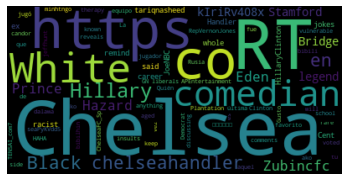

In [57]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(status_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

With bigger text document, we can get more interesting word clouds. You can explore more with bigger dataset on your own to gather more interesting insights. 

## Accessing User Information

So far, we have learnt how to find out the trending topics, how to use query terms to gather tweets, and how to use those tweets gathered to gain insights. There is another method of gathering tweets and useful information: accessing user information. 

By accessing user information, we can gain useful information such as:
   
1. Location
2. Follower count
3. Date of creation
4. Number of tweets

And many more. 

### Getting User Information

Using **users.lookup(screen_name= )**, we can access a user's information. In the argument "screen_name", we have to input the Twitter ID name that we want to access. The Twitter ID name is the name in the form of "@SocialWebMining", where the @ signifies that it is an ID. The output is a nested dictionary in a list, requiring careful navigation. 

As an example, let us try to access Cristiano Ronaldo's Twitter account. Cristiano Ronaldo's Twitter ID is @Cristiano. 

In [58]:
account = twitter_api.users.lookup(screen_name='Cristiano')

In [59]:
print(account)

[{'id': 155659213, 'id_str': '155659213', 'name': 'Cristiano Ronaldo', 'screen_name': 'Cristiano', 'location': 'Turim, Piemonte', 'description': 'This Privacy Policy addresses the collection and use of personal information - https://t.co/Jp6yh1T58c', 'url': 'https://t.co/VcAXB9ryty', 'entities': {'url': {'urls': [{'url': 'https://t.co/VcAXB9ryty', 'expanded_url': 'http://www.facebook.com/cristiano', 'display_url': 'facebook.com/cristiano', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/Jp6yh1T58c', 'expanded_url': 'http://www.cristianoronaldo.com/terms', 'display_url': 'cristianoronaldo.com/terms', 'indices': [79, 102]}]}}, 'protected': False, 'followers_count': 88764350, 'friends_count': 51, 'listed_count': 83632, 'created_at': 'Mon Jun 14 19:09:20 +0000 2010', 'favourites_count': 2, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 3595, 'lang': None, 'status': {'created_at': 'Sat Oct 24 16:55:57 +0000 2020', 'id': 

We can now extract necessary information into variables of our choice. For example, let us extract the **name**, **description**, and **followers_count**. 

In [61]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [75]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [76]:
print(account_name)
print(account_description)
print(account_followers)

Cristiano Ronaldo
This Privacy Policy addresses the collection and use of personal information - https://t.co/Jp6yh1T58c
88764350


### Getting User's Tweets

Getting a user's information is good, but it would be much better to get the tweets of a user. Fortunately, the Twitter API provides such function: **statuses.user_timeline(screen_name= , count= )**

In [64]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='Cristiano', count=100)

In [65]:
print(user_tweets)

[{'created_at': 'Sat Oct 24 16:55:57 +0000 2020', 'id': 1320046381055283202, 'id_str': '1320046381055283202', 'text': 'Siiiiiiiiiii💪🏽 https://t.co/KwWODF5e6N', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1320046375023816704, 'id_str': '1320046375023816704', 'indices': [15, 38], 'media_url': 'http://pbs.twimg.com/media/ElG_LyZWMAAZZ8w.jpg', 'media_url_https': 'https://pbs.twimg.com/media/ElG_LyZWMAAZZ8w.jpg', 'url': 'https://t.co/KwWODF5e6N', 'display_url': 'pic.twitter.com/KwWODF5e6N', 'expanded_url': 'https://twitter.com/Cristiano/status/1320046381055283202/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 544, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 960, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1080, 'h': 1350, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 1320046375023816704, 'id_str': '1320046375023816704', 'indices': [15, 38], 'media_url': 

In [66]:
len(user_tweets)

100

We have gathered latest 100 tweets of Cristiano Ronaldo. In a list, there are 100 dictionaries, each dictionary containing the tweet and its corresponding information. We can do similar methods to extract the necessary information. 



In [67]:
for i in range(100):
    print()
    print(user_tweets[i]['text'])


Siiiiiiiiiii💪🏽 https://t.co/KwWODF5e6N

Let your confidence talks😉 https://t.co/Lro2Ov68nw

Thursday style! 😉 https://t.co/OlNhOit0vh

“El éxito en la vida no se mide por lo que logras, sino por los obstáculos que superas” 😉💪🏽 https://t.co/XCdeSqFv9Y

“Não deixes aquilo que não podes fazer atrapalhar o que podes fazer”😉 https://t.co/yN9rQhmEgE

Unidos dentro e fora do campo! 🇵🇹👏🏽👊🏽 #todosportugal https://t.co/4bQSUIPm2m

This World Mental Health Day let’s get stronger together.
Join me in showing your support.
 
Check out @clearhair f… https://t.co/pzqkfJ21FZ

Obrigado @nikefootball These boots are beautiful and I cannot wait to wear them for my next @selecaoportugal match… https://t.co/ckpf22NLr2

Excelente trabalho equipa!👏🏽
Continuar a trabalhar com a mesma atitude e ambição para conseguirmos o nosso objetivo… https://t.co/GyCIZINlPJ

É sempre um sentimento especial representar o nosso país!🇵🇹👏🏽💪🏽
#todosportugal https://t.co/yTYT5CKZtK

Be bold. Be brave. Be confident.
Never let yo

Now, we will save all of Cristiano Ronaldo's tweets into a variable since we know now how to navigate through the data structure. 

In [68]:
user_texts = [status['text'] for status in user_tweets]

In [69]:
len(user_texts)

100

In [70]:
user_texts

['Siiiiiiiiiii💪🏽 https://t.co/KwWODF5e6N',
 'Let your confidence talks😉 https://t.co/Lro2Ov68nw',
 'Thursday style! 😉 https://t.co/OlNhOit0vh',
 '“El éxito en la vida no se mide por lo que logras, sino por los obstáculos que superas” 😉💪🏽 https://t.co/XCdeSqFv9Y',
 '“Não deixes aquilo que não podes fazer atrapalhar o que podes fazer”😉 https://t.co/yN9rQhmEgE',
 'Unidos dentro e fora do campo! 🇵🇹👏🏽👊🏽 #todosportugal https://t.co/4bQSUIPm2m',
 'This World Mental Health Day let’s get stronger together.\nJoin me in showing your support.\n\xa0\nCheck out @clearhair f… https://t.co/pzqkfJ21FZ',
 'Obrigado @nikefootball These boots are beautiful and I cannot wait to wear them for my next @selecaoportugal match… https://t.co/ckpf22NLr2',
 'Excelente trabalho equipa!👏🏽\nContinuar a trabalhar com a mesma atitude e ambição para conseguirmos o nosso objetivo… https://t.co/GyCIZINlPJ',
 'É sempre um sentimento especial representar o nosso país!🇵🇹👏🏽💪🏽\n#todosportugal https://t.co/yTYT5CKZtK',
 'Be bol

### Vectoriser with User Tweets

Same as before, we can try vectorising Cristiano Ronaldo's tweets using Count Vectoriser, TF-IDF Vectoriser, and visualising through Word Cloud. 

#### Count Vectoriser

In [73]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['016hyjbov6', '0kmvfs0rup', '0kq3gdaw6i', '0lgejdbsbl', '0rpassahnh', '0ynvn2qxny', '10', '100', '1000', '14', '1plvaegs1n', '2020', '2yzfwjr6ck', '4bqsuipm2m', '50', '5mohnxtdaa', '6h2a0ocj3f', '6hzodlzvmi', '6lq1fjrma6', '74bpj1hex8', '7tmmno0to7', '7zz1ysznjp', '89cxzn3wob', '8e4pox2bmg', '8p2gjcfihf', '96', '9iqqmjbxdc', '9r7zgwigey', 'a1kwpxzoxe', 'a5ngy4floj', 'abbiamo', 'about', 'acreditar', 'active', 'again', 'ailrikt6gs', 'aj6uhzfujf', 'ajudaram', 'all', 'alla', 'almost', 'already', 'always', 'amanhã', 'amazing', 'amazingly', 'ambição', 'amor', 'amp', 'and', 'anos', 'another', 'anxiety', 'approved', 'aquilo', 'are', 'around', 'at', 'atingir', 'atitude', 'atrapalhar', 'average', 'azgnpkte4r', 'b69bltvjti', 'back', 'backontrack', 'bacteria', 'be', 'beat', 'beautiful', 'become', 'behind', 'best', 'bianconer', 'bike', 'birthday', 'bisogno', 'board', 'body', 'bold', 'boots', 'bqpj5frcmd', 'brand', 'brave', 'breathe', 'brother', 'build', 'but', 'campo', 'can', 'cannot', 'career', '

In [74]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [77]:
vectorizer = TfidfVectorizer() 
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'siiiiiiiiiii': 467, 'https': 264, 'co': 105, 'kwwodf5e6n': 296, 'let': 303, 'your': 613, 'confidence': 116, 'talks': 508, 'lro2ov68nw': 320, 'thursday': 530, 'style': 497, 'olnhoit0vh': 392, 'el': 159, 'éxito': 620, 'en': 162, 'la': 297, 'vida': 576, 'no': 377, 'se': 455, 'mide': 347, 'por': 417, 'lo': 312, 'que': 428, 'logras': 313, 'sino': 469, 'los': 315, 'obstáculos': 387, 'superas': 502, 'xcdesqfv9y': 605, 'não': 383, 'deixes': 133, 'aquilo': 54, 'podes': 414, 'fazer': 183, 'atrapalhar': 60, 'yn9rqhmege': 610, 'unidos': 563, 'dentro': 134, 'fora': 204, 'do': 145, 'campo': 88, 'todosportugal': 538, '4bqsuipm2m': 13, 'this': 526, 'world': 603, 'mental': 339, 'health': 246, 'day': 130, 'get': 216, 'stronger': 494, 'together': 539, 'join': 285, 'me': 337, 'in': 273, 'showing': 466, 'support': 503, 'check': 97, 'out': 401, 'clearhair': 101, 'pzqkfj21fz': 425, 'obrigado': 386, 'nikefootball': 376, 'these': 521, 'boots': 80, 'are': 55, 'beautiful': 69, 'and': 49, 'cannot': 90, 'wait': 

In [80]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 622)


#### Word Cloud

In [81]:
user_combined = ', '.join(user_texts)

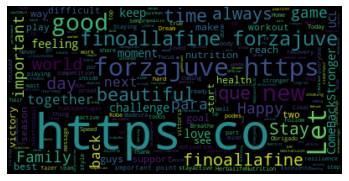

In [82]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access BTS_official's Twitter account. BTS_official's Twitter ID is @bts_bighit.

In [83]:
account = twitter_api.users.lookup(screen_name='bts_bighit')
print(account)

[{'id': 1409798257, 'id_str': '1409798257', 'name': 'BTS_official', 'screen_name': 'bts_bighit', 'location': '', 'description': '#방탄소년단 공식 트위터입니다\nThis is the Official Twitter for #BTS\n\n#BTS_BE 2020.11.20\n0AM EST/ 2PM KST\n\nPre-save "BE" 👉 https://t.co/a2yuFmUSo9', 'url': 'https://t.co/UKFREoHhAr', 'entities': {'url': {'urls': [{'url': 'https://t.co/UKFREoHhAr', 'expanded_url': 'http://bts.ibighit.com', 'display_url': 'bts.ibighit.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/a2yuFmUSo9', 'expanded_url': 'https://www.bts-be.com/', 'display_url': 'bts-be.com', 'indices': [109, 132]}]}}, 'protected': False, 'followers_count': 24784443, 'friends_count': 24, 'listed_count': 33729, 'created_at': 'Tue May 07 09:13:05 +0000 2013', 'favourites_count': 16, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 8749, 'lang': None, 'status': {'created_at': 'Tue Oct 27 01:42:33 +0000 2020', 'id': 1320903680141357057, 'id_st

In [84]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [85]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [86]:
print(account_name)
print(account_description)
print(account_followers)

BTS_official
#방탄소년단 공식 트위터입니다
This is the Official Twitter for #BTS

#BTS_BE 2020.11.20
0AM EST/ 2PM KST

Pre-save "BE" 👉 https://t.co/a2yuFmUSo9
24784443


In [87]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='bts_bighit', count=100)
print(user_tweets)

[{'created_at': 'Tue Oct 27 01:42:33 +0000 2020', 'id': 1320903680141357057, 'id_str': '1320903680141357057', 'text': "We’re so excited to be nominated for the 2020 @AMAs! Don't miss the show, November 22nd at 8/7c on ABC! Find more i… https://t.co/tOxaidE6sk", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AMAs', 'name': 'American Music Awards', 'id': 52536879, 'id_str': '52536879', 'indices': [46, 51]}], 'urls': [{'url': 'https://t.co/tOxaidE6sk', 'expanded_url': 'https://twitter.com/i/web/status/1320903680141357057', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1409798257, 'id_str': '1409798257', 'name': 'BTS_official', 'screen_name': 'b

In [88]:
len(user_tweets)

100

In [89]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


We’re so excited to be nominated for the 2020 @AMAs! Don't miss the show, November 22nd at 8/7c on ABC! Find more i… https://t.co/tOxaidE6sk

RT @bighit_merch: BTS POP-UP : MAP OF THE SOUL Showcase in SEOUL Sketch
(https://t.co/OcTsOmi12w)
 
#BTS_POPUP #MAP_OF_THE_SOUL

[Episode] #방탄소년단 The Tonight Show 현장 비하인드 공개!
(https://t.co/WHz2E67pOq)

[#방탄밤] 갑자기 시작된 방탄이들의 🎵뮤지컬 따라 하기!🎵 주연 배우 뷔와 방탄 앙상블의 폭발적 무대~ 바로 N차 관람 각! #주연배우_뷔 #방탄_앙상블 #방탄_뮤지컬
(https://t.co/rLNgl1DIbD)

RT @morningKall: [BTS POP-UP : MAP OF THE SOUL Showcase in SINGAPORE]
Guest Information &amp; Purchasing Guide
https://t.co/jm2rIBAEb3

Hi SING…

RT @BTS_jp_official: #BTS POP-UP : MAP OF THE SOUL Showcase in TOKYO 運営および購入方法のご案内
詳細はこちら→https://t.co/u8RAKtIIzK
#BTS_POPUP #MAP_OF_THE_SO…

RT @morningKall: [BTS POP-UP : MAP OF THE SOUL Online Store ASIA] 
Guest Information &amp; Purchasing Guide
https://t.co/AG3JhgT4Mg

Countries…

RT @BTS_jp_official: #BTS POP-UP : MAP OF THE SOUL Online Store JAPAN 運営および購入方法のご案内
詳細はこちら→https://t

In [90]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

100

In [91]:
user_texts

["We’re so excited to be nominated for the 2020 @AMAs! Don't miss the show, November 22nd at 8/7c on ABC! Find more i… https://t.co/tOxaidE6sk",
 'RT @bighit_merch: BTS POP-UP : MAP OF THE SOUL Showcase in SEOUL Sketch\n(https://t.co/OcTsOmi12w)\n \n#BTS_POPUP #MAP_OF_THE_SOUL',
 '[Episode] #방탄소년단 The Tonight Show 현장 비하인드 공개!\n(https://t.co/WHz2E67pOq)',
 '[#방탄밤]\xa0갑자기\xa0시작된\xa0방탄이들의\xa0🎵뮤지컬\xa0따라\xa0하기!🎵\xa0주연\xa0배우\xa0뷔와\xa0방탄\xa0앙상블의\xa0폭발적\xa0무대~\xa0바로\xa0N차\xa0관람\xa0각! #주연배우_뷔\xa0#방탄_앙상블\xa0#방탄_뮤지컬\n(https://t.co/rLNgl1DIbD)',
 'RT @morningKall: [BTS POP-UP : MAP OF THE SOUL Showcase in SINGAPORE]\nGuest Information &amp; Purchasing Guide\nhttps://t.co/jm2rIBAEb3\n\nHi SING…',
 'RT @BTS_jp_official: #BTS POP-UP : MAP OF THE SOUL Showcase in TOKYO 運営および購入方法のご案内\n詳細はこちら→https://t.co/u8RAKtIIzK\n#BTS_POPUP #MAP_OF_THE_SO…',
 'RT @morningKall: [BTS POP-UP : MAP OF THE SOUL Online Store ASIA] \nGuest Information &amp; Purchasing Guide\nhttps://t.co/AG3JhgT4Mg\n\nCountries…',
 'RT @BT

#### Count Vectoriser

In [93]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['05', '0lkjpoem1r', '10', '1013', '12pm', '14th', '15', '15sec', '15초', '15초컷', '18r5dqnxrj', '1fzumzcf17', '1년', '1위', '1위와', '1위한', '1회차', '2018', '2019', '2020', '22', '22nd', '29', '2foplnr74q', '2번째', '2위를', '2일전', '2주', '2회차도', '3uaerkq5si', '3번', '3일', '4asvo1cxcu', '4년연속', '5khjccsbzr', '5l2caajxjp', '62nd', '6th', '7c', '7ifmxs9zb2', '7zsf3qwglt', '7일', '8nr0qg9uu8', '8장입니다', '9zfj587k5k', '9장이', 'abc', 'addition', 'additional', 'affair', 'ag3jhgt4mg', 'again', 'agdmaywdtk', 'al', 'albums', 'alert', 'all', 'amas', 'amazing', 'amp', 'an', 'and', 'announce', 'announced', 'announcement', 'annual', 'are', 'army', 'artist', 'as', 'asia', 'asiqmck6fj', 'asked', 'at', 'available', 'awards', 'ax2mykbr3y', 'ayy', 'aznfqyqbgy', 'back', 'bang', 'bbmas', 'be', 'before', 'beginning', 'below', 'bewater', 'bighit_merch', 'bighitent', 'billboard', 'birthday', 'bj7kys0uew', 'black', 'box', 'brazil', 'break', 'bskegcnzrl', 'bts', 'bts_', 'bts_be', 'bts_bighit', 'bts_dynamite', 'bts_jp_official

In [94]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [95]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'we': 448, 're': 340, 'so': 375, 'excited': 168, 'to': 408, 'be': 82, 'nominated': 288, 'for': 182, 'the': 398, '2020': 19, 'amas': 57, 'don': 147, 'miss': 272, 'show': 364, 'november': 290, '22nd': 21, 'at': 73, '7c': 38, 'on': 301, 'abc': 46, 'find': 179, 'more': 274, 'https': 218, 'co': 129, 'toxaide6sk': 416, 'rt': 349, 'bighit_merch': 87, 'bts': 97, 'pop': 324, 'up': 430, 'map': 264, 'of': 298, 'soul': 378, 'showcase': 365, 'in': 222, 'seoul': 360, 'sketch': 371, 'octsomi12w': 297, 'bts_popup': 103, 'map_of_the_soul': 267, 'episode': 164, '방탄소년단': 588, 'tonight': 412, '현장': 786, '비하인드': 608, '공개': 485, 'whz2e67poq': 454, '방탄밤': 586, '갑자기': 479, '시작된': 647, '방탄이들의': 594, '뮤지컬': 567, '따라': 539, '하기': 766, '주연': 722, '배우': 596, '뷔와': 607, '방탄': 580, '앙상블의': 665, '폭발적': 761, '무대': 562, '바로': 571, 'n차': 292, '관람': 491, '주연배우_뷔': 723, '방탄_앙상블': 582, '방탄_뮤지컬': 581, 'rlngl1dibd': 347, 'morningkall': 275, 'singapore': 369, 'guest': 200, 'information': 224, 'amp': 59, 'purchasing': 329, 'g

In [96]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 791)


#### Word Cloud

In [97]:
user_combined = ', '.join(user_texts)

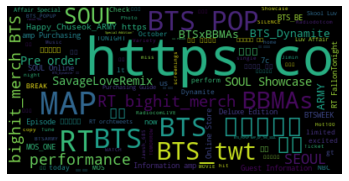

In [98]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access Donald J. Trump's Twitter account. Donald J. Trump's Twitter ID is @realDonaldTrump.

In [99]:
account = twitter_api.users.lookup(screen_name='realDonaldTrump')
print(account)

[{'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/OMxB0x7xC5', 'entities': {'url': {'urls': [{'url': 'https://t.co/OMxB0x7xC5', 'expanded_url': 'http://www.Instagram.com/realDonaldTrump', 'display_url': 'Instagram.com/realDonaldTrump', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 87356403, 'friends_count': 50, 'listed_count': 121680, 'created_at': 'Wed Mar 18 13:46:38 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 57634, 'lang': None, 'status': {'created_at': 'Tue Oct 27 03:41:08 +0000 2020', 'id': 1320933522601844738, 'id_str': '1320933522601844738', 'text': 'https://t.co/Wv6WVH6US8', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': 

In [100]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [101]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [102]:
print(account_name)
print(account_description)
print(account_followers)

Donald J. Trump
45th President of the United States of America🇺🇸
87356403


In [103]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='realDonaldTrump', count=100)
print(user_tweets)

[{'created_at': 'Tue Oct 27 03:41:08 +0000 2020', 'id': 1320933522601844738, 'id_str': '1320933522601844738', 'text': 'https://t.co/Wv6WVH6US8', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1320933231840157696, 'id_str': '1320933231840157696', 'indices': [0, 23], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1320933231840157696/pu/img/5duG8GVYEYAgI1W3.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1320933231840157696/pu/img/5duG8GVYEYAgI1W3.jpg', 'url': 'https://t.co/Wv6WVH6US8', 'display_url': 'pic.twitter.com/Wv6WVH6US8', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/1320933522601844738/video/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'small': {'w': 680, 'h': 383, 'resize': 'fit'}, 'large': {'w': 1280, 'h': 720, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 13209332318401576

In [104]:
len(user_tweets)

100

In [105]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


https://t.co/Wv6WVH6US8

https://t.co/sFRCTwIwPm

https://t.co/bjC5XWlfOJ

https://t.co/CCuTybUbqi

https://t.co/5FaguoWuHU

RT @washingtonpost: Senate confirms Amy Coney Barrett to Supreme Court, cementing a 6-3 conservative majority with Trump’s third justice ht…

RT @HouseGOP: #Confirmed

Congratulations to 𝐽𝑢𝑠𝑡𝑖𝑐𝑒 Amy Coney Barrett. 🇺🇸 https://t.co/ES8nii57o2

RT @WhiteHouse: American energy production is soaring under President @realDonaldTrump!

Under his leadership, the United States has become…

RT @TeamTrump: President @realDonaldTrump just finished THREE rallies in #Pennsylvania!

Joe Biden will raise your taxes, ban fracking and…

RT @GOPLeader: Amy Coney Barrett's commitment to the Constitution makes her an outstanding addition to the Supreme Court.

Congratulations…


In [106]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

100

In [107]:
user_texts

['https://t.co/Wv6WVH6US8',
 'https://t.co/sFRCTwIwPm',
 'https://t.co/bjC5XWlfOJ',
 'https://t.co/CCuTybUbqi',
 'https://t.co/5FaguoWuHU',
 'RT @washingtonpost: Senate confirms Amy Coney Barrett to Supreme Court, cementing a 6-3 conservative majority with Trump’s third justice ht…',
 'RT @HouseGOP: #Confirmed\n\nCongratulations to 𝐽𝑢𝑠𝑡𝑖𝑐𝑒 Amy Coney Barrett. 🇺🇸 https://t.co/ES8nii57o2',
 'RT @WhiteHouse: American energy production is soaring under President @realDonaldTrump!\n\nUnder his leadership, the United States has become…',
 'RT @TeamTrump: President @realDonaldTrump just finished THREE rallies in #Pennsylvania!\n\nJoe Biden will raise your taxes, ban fracking and…',
 "RT @GOPLeader: Amy Coney Barrett's commitment to the Constitution makes her an outstanding addition to the Supreme Court.\n\nCongratulations…",
 'RT @DonaldJTrumpJr: Biden: yea if that’s true, put it on your website \n\nTrump: Ok.',
 'RT @KimStrassel: 1) On this question of Joe Biden being somehow exonerated on th

#### Count Vectoriser

In [108]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['000', '16', '2016', '27', '2nd', '3gneu2d4at', '3rd', '4ga0xz2fnr', '4hbumgeahi', '5faguowuhu', '60minutes', '6deqceiwff', '7lzwr4ot9w', '8o90jjbj3v', '99', '9hwkodkdmt', 'aax936uvzz', 'about', 'addition', 'administrations', 'admission', 'after', 'again', 'agreed', 'ahead', 'aliyev', 'all', 'allentown', 'always', 'am', 'amazing', 'amen', 'amendment', 'america', 'american', 'amp', 'amy', 'an', 'anchor', 'and', 'another', 'any', 'anything', 'appeals', 'appear', 'appearance', 'are', 'armenian', 'around', 'arthurschwartz', 'as', 'ask', 'asks', 'at', 'away', 'axhstseyzc', 'azerbaijani', 'back', 'ballot', 'ballots', 'ban', 'barack', 'bare', 'barrett', 'bc2h4ozhqp', 'be', 'be4mhh23o9', 'became', 'because', 'become', 'been', 'being', 'best', 'between', 'biden', 'big', 'bigger', 'bjc5xwlfoj', 'bkirkland7', 'border', 'brags', 'break', 'bright', 'bring', 'bringing', 'brother', 'build', 'burisma', 'but', 'by', 'c8ljjlzhod', 'california', 'called', 'calls', 'campaigning', 'can', 'carolina', 'case

In [109]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


#### TF-IDF Vectoriser

In [110]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'https': 263, 'co': 117, 'wv6wvh6us8': 604, 'sfrctwiwpm': 480, 'bjc5xwlfoj': 77, 'ccutybubqi': 98, '5faguowuhu': 9, 'rt': 459, 'washingtonpost': 579, 'senate': 476, 'confirms': 124, 'amy': 36, 'coney': 122, 'barrett': 63, 'to': 535, 'supreme': 507, 'court': 136, 'cementing': 99, 'conservative': 127, 'majority': 319, 'with': 597, 'trump': 545, 'third': 529, 'justice': 293, 'ht': 262, 'housegop': 260, 'confirmed': 123, 'congratulations': 125, '𝐽𝑢𝑠𝑡𝑖𝑐𝑒': 620, 'es8nii57o2': 186, 'whitehouse': 591, 'american': 34, 'energy': 184, 'production': 420, 'is': 278, 'soaring': 488, 'under': 554, 'president': 411, 'realdonaldtrump': 441, 'his': 252, 'leadership': 300, 'the': 522, 'united': 556, 'states': 499, 'has': 230, 'become': 69, 'teamtrump': 515, 'just': 292, 'finished': 195, 'three': 531, 'rallies': 437, 'in': 270, 'pennsylvania': 394, 'joe': 286, 'biden': 74, 'will': 594, 'raise': 436, 'your': 617, 'taxes': 513, 'ban': 60, 'fracking': 202, 'and': 39, 'gopleader': 215, 'commitment': 120, 'co

In [111]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 621)


#### Word Cloud

In [112]:
user_combined = ', '.join(user_texts)

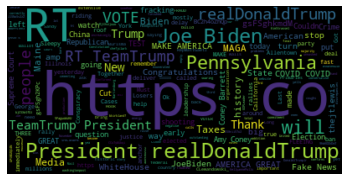

In [113]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access Petr Cech's Twitter account. Petr Cech's Twitter ID is @PetrCech.

In [114]:
account = twitter_api.users.lookup(screen_name='PetrCech')
print(account)

[{'id': 2493199232, 'id_str': '2493199232', 'name': 'Petr Cech', 'screen_name': 'PetrCech', 'location': 'London, U.K', 'description': 'Technical and Performance Advisor @chelseafc', 'url': 'https://t.co/8Ns88z6UoR', 'entities': {'url': {'urls': [{'url': 'https://t.co/8Ns88z6UoR', 'expanded_url': 'http://www.petr-cech.com', 'display_url': 'petr-cech.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1809632, 'friends_count': 396, 'listed_count': 2699, 'created_at': 'Tue May 13 16:13:52 +0000 2014', 'favourites_count': 3294, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 2670, 'lang': None, 'status': {'created_at': 'Thu Oct 22 20:09:40 +0000 2020', 'id': 1319370356394700800, 'id_str': '1319370356394700800', 'text': 'RT @VGouttebarge: Following our @TheIFAB Concussion Expert Group meeting, football is finally stepping forward for the protection of player…', 'truncated': False, 'entities': {'ha

In [115]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [116]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [117]:
print(account_name)
print(account_description)
print(account_followers)

Petr Cech
Technical and Performance Advisor @chelseafc
1809632


In [118]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='PetrCech', count=100)
print(user_tweets)

[{'created_at': 'Thu Oct 22 20:09:40 +0000 2020', 'id': 1319370356394700800, 'id_str': '1319370356394700800', 'text': 'RT @VGouttebarge: Following our @TheIFAB Concussion Expert Group meeting, football is finally stepping forward for the protection of player…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'VGouttebarge', 'name': 'Vincent Gouttebarge', 'id': 78220103, 'id_str': '78220103', 'indices': [3, 16]}, {'screen_name': 'TheIFAB', 'name': 'The IFAB', 'id': 703177200778883072, 'id_str': '703177200778883072', 'indices': [32, 40]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2493199232, 'id_str': '2493199232', 'name': 'Petr Cech', 'screen_name': 'PetrCech', 'location': 'London, U.K', 'descripti

In [120]:
len(user_tweets)

99

In [121]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


RT @VGouttebarge: Following our @TheIFAB Concussion Expert Group meeting, football is finally stepping forward for the protection of player…

@MesutOzil1088 @ChelseaFC @skrapid 😅

@433 That left foot is definitely genuine 😉

RT @ChelseaFC: We're in Group E for this season's @ChampionsLeague! 👊

Thoughts on the draw? #UCLdraw https://t.co/BqUwdSanWw

Roman Abramovich recognised for his charitable work and fight against antisemitism ... https://t.co/EsTE8kUGTM

.@ceskarepre_cz  gratulace všem hráčům a trenerům k výkonu , protože i přes porážku to byl výkon , který měl parame… https://t.co/hlC8VHLO8M

RT @ChelseaFC: Happy birthday to former Blue, Carlo Cudicini! 🥳 https://t.co/uGr3QkNqjL

@Nicki48141067 @Aubameyang7 @MesutOzil1088 @LacazetteAlex @IanWright0 @LeeDixon2 @thedavidseaman @HectorBellerin… https://t.co/PhmxZ45fIo

@barakfever Un abrazo hermano 😁😉. Disfruta!

RT @ChelseaFC: Signed. Sealed. Delivered.

#HiKai 👋 https://t.co/mJGX67SPrD


In [122]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

99

In [123]:
user_texts

['RT @VGouttebarge: Following our @TheIFAB Concussion Expert Group meeting, football is finally stepping forward for the protection of player…',
 '@MesutOzil1088 @ChelseaFC @skrapid 😅',
 '@433 That left foot is definitely genuine 😉',
 "RT @ChelseaFC: We're in Group E for this season's @ChampionsLeague! 👊\n\nThoughts on the draw? #UCLdraw https://t.co/BqUwdSanWw",
 'Roman Abramovich recognised for his charitable work and fight against antisemitism ... https://t.co/EsTE8kUGTM',
 '.@ceskarepre_cz  gratulace všem hráčům a trenerům k výkonu , protože i přes porážku to byl výkon , který měl parame… https://t.co/hlC8VHLO8M',
 'RT @ChelseaFC: Happy birthday to former Blue, Carlo Cudicini! 🥳 https://t.co/uGr3QkNqjL',
 '@Nicki48141067 @Aubameyang7 @MesutOzil1088 @LacazetteAlex @IanWright0 @LeeDixon2 @thedavidseaman @HectorBellerin… https://t.co/PhmxZ45fIo',
 '@barakfever Un abrazo hermano 😁😉. Disfruta!',
 'RT @ChelseaFC: Signed. Sealed. Delivered.\n\n#HiKai 👋 https://t.co/mJGX67SPrD',
 'RT @Chel

#### Count Vectoriser

In [124]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['000', '04', '0bzjqh2ybn', '100', '11am', '13', '15', '17', '18', '1996', '1p0peqyaig', '1simo1987', '20', '2003', '2005', '2010', '2012', '2019', '21', '21st', '23fjgwr531', '29', '2wsxy2fxzt', '30', '30pm', '33', '433', '48', '56', '5th', '60', '60th', '70klsrxc1g', '76', '7axxuatxdq', '82nd', 'aap03102', 'able', 'about', 'abramovich', 'abrazo', 'acsparta_cz', 'again', 'against', 'ago', 'ai', 'alanmillergk', 'alanwm1986', 'all', 'also', 'always', 'am', 'amazing', 'an', 'and', 'andrewrobertso5', 'antidopage', 'antisemitism', 'après', 'are', 'area', 'arsenal', 'as', 'at', 'aubameyang7', 'avk1bksfi9', 'award', 'ať', 'back', 'backs', 'bad', 'ball', 'barakfever', 'bbcfootball', 'bbcmotd', 'bbcsport', 'be', 'beaucoup', 'beautiful', 'because', 'been', 'behind', 'belletti', 'best', 'billygilmourrr', 'birthday', 'bl', 'blue', 'board', 'bobwilsonbwsc', 'bolton', 'boot', 'borci', 'boss', 'bought', 'bquwdsanww', 'brankáře', 'brankářů', 'bridge', 'brilliant', 'buchtelovi', 'but', 'bxxbnex8uh', '

In [125]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [126]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'rt': 476, 'vgouttebarge': 590, 'following': 229, 'our': 415, 'theifab': 540, 'concussion': 147, 'expert': 209, 'group': 262, 'meeting': 363, 'football': 231, 'is': 297, 'finally': 223, 'stepping': 516, 'forward': 234, 'for': 232, 'the': 537, 'protection': 443, 'of': 405, 'player': 432, 'mesutozil1088': 367, 'chelseafc': 132, 'skrapid': 500, '433': 26, 'that': 536, 'left': 341, 'foot': 230, 'definitely': 167, 'genuine': 249, 'we': 609, 're': 461, 'in': 291, 'this': 551, 'season': 487, 'championsleague': 128, 'thoughts': 553, 'on': 407, 'draw': 183, 'ucldraw': 576, 'https': 285, 'co': 139, 'bquwdsanww': 95, 'roman': 473, 'abramovich': 39, 'recognised': 463, 'his': 275, 'charitable': 129, 'work': 628, 'and': 54, 'fight': 221, 'against': 43, 'antisemitism': 57, 'este8kugtm': 203, 'ceskarepre_cz': 122, 'gratulace': 259, 'všem': 603, 'hráčům': 284, 'trenerům': 567, 'výkonu': 601, 'protože': 445, 'přes': 452, 'porážku': 435, 'to': 560, 'byl': 104, 'výkon': 600, 'který': 330, 'měl': 383, 'pa

In [127]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(99, 650)


#### Word Cloud

In [128]:
user_combined = ', '.join(user_texts)

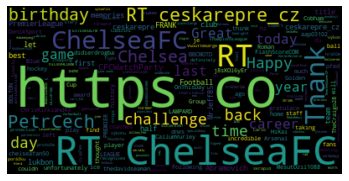

In [129]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access BLACKPINK GLOBAL BLINK's Twitter account. BLACKPINK GLOBAL BLINK's Twitter ID is @ygofficialblink.

In [130]:
account = twitter_api.users.lookup(screen_name='ygofficialblink')
print(account)

[{'id': 878204370403250176, 'id_str': '878204370403250176', 'name': 'BLACKPINK GLOBAL BLINK', 'screen_name': 'ygofficialblink', 'location': '', 'description': 'YG ENTERTAINMENT #BLACKPINK OFFICIAL BLINK TWITTER l #블랙핑크 팬클럽 블링크 공식 트위터입니다.', 'url': 'https://t.co/c2mkxA118z', 'entities': {'url': {'urls': [{'url': 'https://t.co/c2mkxA118z', 'expanded_url': 'https://blink.blackpinkofficial.com/', 'display_url': 'blink.blackpinkofficial.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 5522679, 'friends_count': 5, 'listed_count': 5780, 'created_at': 'Fri Jun 23 10:53:32 +0000 2017', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 1322, 'lang': None, 'status': {'created_at': 'Tue Oct 27 05:24:03 +0000 2020', 'id': 1320959424022761472, 'id_str': '1320959424022761472', 'text': 'RT @sbsnoriter: 💫201025 인기가요 PD노트\n\n3주 연속 1위로 트로피를 거머쥔 블랙핑크🖤❤\n블링크를 심쿵하게 만들 블핑이들의 무대 현장사진٩(๑˃̵ᴗ˂̵)و

In [131]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [132]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [133]:
print(account_name)
print(account_description)
print(account_followers)

BLACKPINK GLOBAL BLINK
YG ENTERTAINMENT #BLACKPINK OFFICIAL BLINK TWITTER l #블랙핑크 팬클럽 블링크 공식 트위터입니다.
5522679


In [134]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='ygofficialblink', count=100)
print(user_tweets)

[{'created_at': 'Tue Oct 27 05:24:03 +0000 2020', 'id': 1320959424022761472, 'id_str': '1320959424022761472', 'text': 'RT @sbsnoriter: 💫201025 인기가요 PD노트\n\n3주 연속 1위로 트로피를 거머쥔 블랙핑크🖤❤\n블링크를 심쿵하게 만들 블핑이들의 무대 현장사진٩(๑˃̵ᴗ˂̵)و\n\nMORE📸 https://t.co/flJVNdEDhA\n\n#인기가요 #in…', 'truncated': False, 'entities': {'hashtags': [{'text': '인기가요', 'indices': [130, 135]}], 'symbols': [], 'user_mentions': [{'screen_name': 'sbsnoriter', 'name': 'SBS인기가요 (SBS Inkigayo)', 'id': 1130755875210088448, 'id_str': '1130755875210088448', 'indices': [3, 14]}], 'urls': [{'url': 'https://t.co/flJVNdEDhA', 'expanded_url': 'https://programs.sbs.co.kr/enter/gayo/visualboard/54795?cmd=view&page=1&board_no=432702', 'display_url': 'programs.sbs.co.kr/enter/gayo/vis…', 'indices': [105, 128]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_n

In [135]:
len(user_tweets)

100

In [136]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


RT @sbsnoriter: 💫201025 인기가요 PD노트

3주 연속 1위로 트로피를 거머쥔 블랙핑크🖤❤
블링크를 심쿵하게 만들 블핑이들의 무대 현장사진٩(๑˃̵ᴗ˂̵)و

MORE📸 https://t.co/flJVNdEDhA

#인기가요 #in…

RT @SuperStar_YG: [SuperStar YG] #blackpink in your area!
#BLACKPINK with the pre-register news!

3 winners among the retweets will get [Si…

RT @SuperStar_YG: [SuperStar YG] #blackpink in your area!

사전예약 소식을 #블랙핑크 가 전해드려요!
아직 사전 예약 안 하셨다면?

리트윗 해주신 여러분들 중 3분께는 [싸인 CD] 를 드려요!
*상황…

RT @kpop_sbs: [🎥#페이스캠] 블랙핑크 - Lovesick Girls

#인기가요 #BLACKPINK #블랙핑크 #LovesickGirls @BLACKPINK

#지수: https://t.co/SIL4kGumOA
#제니: https://t…

RT @kpop_sbs: [🎥#안방1열직캠] 블랙핑크 - Lovesick Girls

#인기가요 #BLACKPINK #블랙핑크 #LovesickGirls @BLACKPINK

#지수: https://t.co/ArdM30hkiZ
#제니: https:/…

RT @kpop_sbs: [🎥#앵콜캠]

3주 연속 1위 🏆🏆🏆
명창핑크의 트리플 크라운을 축하합니다🖤💖

#인기가요 #블랙핑크 #BLACKPINK #LovesickGirls @BLACKPINK 

👉https://t.co/YpUoHx78wK htt…

RT @BLACKPINK: Thank you so much BLINKs 🖤
lovesick girls so full with love https://t.co/2nUPsuAEpN

RT @ygent_official: #BLACKPINK ‘Lovesick Girls’

In [137]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

100

In [138]:
user_texts

['RT @sbsnoriter: 💫201025 인기가요 PD노트\n\n3주 연속 1위로 트로피를 거머쥔 블랙핑크🖤❤\n블링크를 심쿵하게 만들 블핑이들의 무대 현장사진٩(๑˃̵ᴗ˂̵)و\n\nMORE📸 https://t.co/flJVNdEDhA\n\n#인기가요 #in…',
 'RT @SuperStar_YG: [SuperStar YG] #blackpink in your area!\n#BLACKPINK with the pre-register news!\n\n3 winners among the retweets will get [Si…',
 'RT @SuperStar_YG: [SuperStar YG] #blackpink in your area!\n\n사전예약 소식을 #블랙핑크 가 전해드려요!\n아직 사전 예약 안 하셨다면?\n\n리트윗 해주신 여러분들 중 3분께는 [싸인 CD] 를 드려요!\n*상황…',
 'RT @kpop_sbs: [🎥#페이스캠] 블랙핑크 - Lovesick Girls\n\n#인기가요 #BLACKPINK #블랙핑크 #LovesickGirls @BLACKPINK\n\n#지수: https://t.co/SIL4kGumOA\n#제니: https://t…',
 'RT @kpop_sbs: [🎥#안방1열직캠] 블랙핑크 - Lovesick Girls\n\n#인기가요 #BLACKPINK #블랙핑크 #LovesickGirls @BLACKPINK\n\n#지수: https://t.co/ArdM30hkiZ\n#제니: https:/…',
 'RT @kpop_sbs: [🎥#앵콜캠]\n\n3주 연속 1위 🏆🏆🏆\n명창핑크의 트리플 크라운을 축하합니다🖤💖\n\n#인기가요 #블랙핑크 #BLACKPINK #LovesickGirls @BLACKPINK \n\n👉https://t.co/YpUoHx78wK htt…',
 'RT @BLACKPINK: Thank you so much BLINKs 🖤\nlovesick girls so full with love https://t.co/2nUPsu

#### Count Vectoriser

In [139]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['0505', '10', '1011', '1018', '1025', '10대의', '14', '15', '16', '16oszdnaxe', '1f4nv8if4d', '1stfullalbum', '1thek', '1시', '1열에서', '1위', '1위로', '1위를', '1위한', '200', '2001018', '201010', '201017', '201025', '2020', '20201', '20201021_7pmkst', '21', '21st', '24', '24_365_with_blac', '24_365_with_black', '2nupsuaepn', '2주', '300', '30분', '365', '3k2syyopp0', '3년', '3분께는', '3시', '3시간', '3주', '40분', '4itobzmega', '4k', '54sfpin48y', '5txxpsgons', '5시', '600', '6nkeowkk7w', '7ldmuzldja', '7pm', '7시', '8dxg5e1jbk', '8qvf5w5pjz', '95zxwukmbh', '9시', 'abc', 'abeepnypn3', 'about', 'acbre1ygbs', 'aeaxbv6u9b', 'aglzf35u1s', 'album', 'all', 'always', 'among', 'amp', 'and', 'ardm30hkiz', 'are', 'area', 'around', 'artists', 'b8cvfbab09', 'back', 'be', 'behindtherecord', 'bgm으로', 'billion', 'black', 'blackpink', 'blackpinkinyourarea', 'blackpinkongma', 'blackpinkonkimmel', 'blink', 'blinks', 'boombayah', 'both', 'brand', 'but', 'c2fjj0e3iy', 'can', 'cat', 'cd', 'check', 'co', 'coex', 'comeback', 'com

In [140]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [141]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'rt': 273, 'sbsnoriter': 279, '201025': 23, '인기가요': 530, 'pd노트': 248, '3주': 42, '연속': 511, '1위로': 16, '트로피를': 579, '거머쥔': 384, '블랙핑크': 452, '블링크를': 458, '심쿵하게': 490, '만들': 428, '블핑이들의': 464, '무대': 437, '현장사진٩': 604, 'more': 219, 'https': 160, 'co': 97, 'fljvndedha': 132, 'in': 168, 'superstar_yg': 301, 'superstar': 300, 'yg': 363, 'blackpink': 82, 'your': 368, 'area': 72, 'with': 357, 'the': 309, 'pre': 256, 'register': 266, 'news': 228, 'winners': 356, 'among': 67, 'retweets': 268, 'will': 355, 'get': 138, 'si': 285, '사전예약': 471, '소식을': 480, '전해드려요': 546, '아직': 495, '사전': 470, '예약': 515, '하셨다면': 591, '리트윗': 422, '해주신': 599, '여러분들': 510, '3분께는': 39, '싸인': 492, 'cd': 95, '드려요': 410, '상황': 474, 'kpop_sbs': 186, '페이스캠': 584, 'lovesick': 202, 'girls': 140, 'lovesickgirls': 206, '지수': 555, 'sil4kgumoa': 286, '제니': 549, '안방1열직캠': 500, 'ardm30hkiz': 70, '앵콜캠': 502, '1위': 15, '명창핑크의': 433, '트리플': 580, '크라운을': 573, '축하합니다': 563, 'ypuohx78wk': 370, 'htt': 158, 'thank': 306, 'you': 367, 'so': 29

In [142]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 610)


#### Word Cloud

In [143]:
user_combined = ', '.join(user_texts)

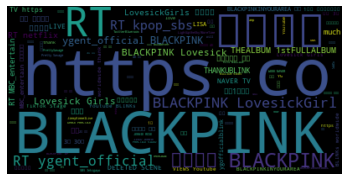

In [144]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion

#### 2016707079 하상천

                                                                                                


- 이번 lab은 SNS Scraping을 하는 것이었다. 트위터 API를 사용하기 위해, 권한이 있는 key로 초기화하고 미국과 전세계의 trend에 대해 알아보았다. 수업시간에 배운 json_normalize를 통해 dictionary 형태의 파일을 보기 쉽게 접근 할 수 있었다.

- 트위터 API 중 search.tweets(q='#PremierLeague', count=100) 라는 함수를 통해 #PremierLeague 라는 hashtag를 포함한 tweets 을 count 개수 만큼 얻을 수 있었다. 그리고 얻어 온 tweets 의 text와 좋아요 수 , 리트윗 수를 확인해보았다. 마찬가지로 평소에 관심이 많았던 잉글랜드 축구 팀 Chelsea에 대해서도 확인해보았다. 또한 수업시간에 배웠던 Count Vectorisation 과 TF-IDF Vectorisation 방법을 이용하여 Text Vectorisation을 하였다. tweets 의 text를 join함수를 통해 하나의 string으로 합치고 word cloud를 plot하여 눈으로 확인해보았다. data가 많지 않아 리트윗할 때 나오는 RT나, https 같은 것들이 집중적으로 나오긴 하였지만 data를 많이 모아서 진행해본다면 더 유의미한 정보를 얻을 수 있을 것 같다.

- 트위터 API 중 users.lookup(screen_name='') 라는 함수를 통해 세계적인 축구선수 호날두, K-POP의 중심인 BTS와 Blackpink, 현재 미국 대통령인 도널드 트럼프,  좋아하는 잉글랜드 축구팀 첼시의 레전드 골키퍼 체흐 까지 다섯 개의 twitter ID를 통해 user의 정보들을 얻어 보았다. 우선 이름과, 자기소개, 팔로우 수를 확인해보았고, user가 작성한 tweets 의 text를 list로 모아서 앞의 과정에서 진행해본 것 처럼 Count Vectorisation 과 TF-IDF Vectorisation 방법을 이용하여 Text Vectorisation을 하였다. 또한 list로 모은 text들을 join함수를 통해 하나의 string으로 합치고 word cloud를 plot하여 눈으로 확인해보았다.

- 이번 lab을 하면서 web crawling 뿐만 아니라 SNS의 정보도 가져올 수 있다는 것을 알게 되었고, 평소에 관심있었던 주제와 인물들의 twitter 정보들을 가져와서 재미있었던 것 같다. 다음의 기회가 된다면 instagram이나 facebook에서 scraping 하는 것도 재미있을 것 같다.